In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [2]:
g = 9.81
m = 70
h0 = 32000
v0 = 0
step = 10000
y0 = [h0, v0]

In [3]:
def intercept(t, s):
    # t: array, time linspace
    # s: ode solutions
    return round(t[np.argwhere(s[:, 0]<=0)[0][0]])


# ODE defintions, requiring initial conditions and time linspace
def dydt(initial, t):
    h, v = initial
    return [v, -g]

c2 = 0.5
def dydt_2(initial, t):
    h, v = initial
    return [v, -(c2/m) * v *np.abs(v) - g]

H = 8000
Re = 6370e3
def dydt_3(initial, t):
    y, v = initial
    c2 = 0.5 * np.exp(-y/H)
    g = 9.8 / ((1 + y/Re)**2)
    return [v, -(c2/m) * v *np.abs(v) - g]

In [4]:
t0 = 0 
tf = 100
times = np.linspace(t0, tf, step)

In [5]:
sol = odeint(dydt, y0, times)

Text(0.5, 1.0, 'Air Firctionless Parachutist')

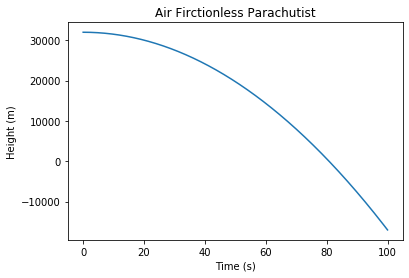

In [6]:
plt.plot(times, sol[:, 0])
plt.xlabel("Time (s)"); plt.ylabel("Height (m)"); plt.title("Air Firctionless Parachutist")

In [7]:
print(f"The parachutist hit the ground at {int(intercept(times, sol))}s.")

The parachutist hit the ground at 81s.


In [8]:
tf2 = 1000
times2 = np.linspace(t0, tf2, step)
sol2 = odeint(dydt_2, y0, times2)

Text(0.5, 1.0, 'Air Resistance Parachutist')

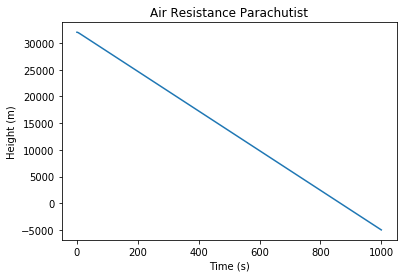

In [9]:
plt.plot(times2, sol2[:, 0])
plt.xlabel("Time (s)"); plt.ylabel("Height (m)"); plt.title("Air Resistance Parachutist")

In [10]:
print(f"The parachutist hit the ground at {int(intercept(times2, sol2))}s.")

The parachutist hit the ground at 866s.


In [11]:
tf3 = 500
times3 = np.linspace(t0, tf3, step)
sol3 = odeint(dydt_3, y0, times3)

Text(0.5, 1.0, 'Air Resistance Parachutist, Varaible Air Density and Gravity')

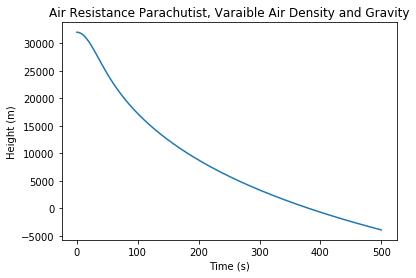

In [12]:
plt.plot(times3, sol3[:, 0])
plt.xlabel("Time (s)"); plt.ylabel("Height (m)"); plt.title("Air Resistance Parachutist, Varaible Air Density and Gravity")

In [13]:
print(f"The parachutist hit the ground at {int(intercept(times3, sol3))}s.")

The parachutist hit the ground at 381s.


Text(0.5, 1.0, 'Velocity with Variable Air Density and Gravity')

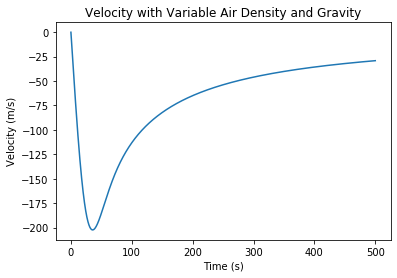

In [14]:
plt.plot(times3, sol3[:,1])
plt.xlabel("Time (s)"); plt.ylabel("Velocity (m/s)"); plt.title("Velocity with Variable Air Density and Gravity")

Text(0.5, 1.0, 'Height with Variable Air Density and Gravity')

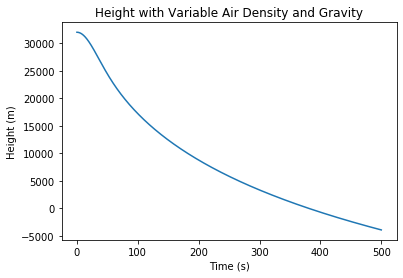

In [15]:
plt.plot(times3, sol3[:,0])
plt.xlabel("Time (s)"); plt.ylabel("Height (m)"); plt.title("Height with Variable Air Density and Gravity")

In [16]:
y = sol3[:, 0]
v = sol3[:, 1] 
c2 = 0.5 * np.exp(-y/H)
g = 9.8 / ((1 + y/Re)**2)
F = -(c2/m) * v *np.abs(v) - g
a = F/m

Text(0.5, 1.0, 'Accleration with Variable Air Density and Gravity')

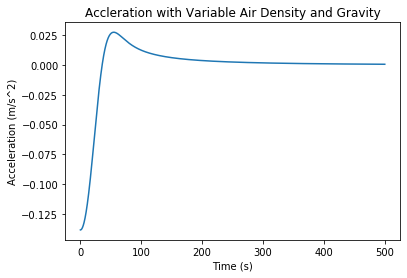

In [17]:
plt.plot(times3, a)
plt.xlabel("Time (s)"); plt.ylabel("Acceleration (m/s^2)"); plt.title("Accleration with Variable Air Density and Gravity")

## Final answers:
- a) 81s
- b) 866s
- c) 381s
- d) As the parachutist continues to fall with increased speed closer to the surface, air resistance increases its force. Once air resistance becomes the dominant force, the parachiter will experience upwards acceleration (still with negative velocity).